In [111]:
#Start making magic!
%matplotlib widget


In [2]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Initial load in of the data
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
#read city data and sore as a pandas df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
#read ride data and sore as a pandas df
ride_data_df = pd.read_csv(ride_data_to_load)

In [6]:
#columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
#count any null columns and rows
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
#get the datatypes
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
sum(city_data_df['type']=='Urban')

66

In [11]:
sum(city_data_df['type']=='Suburban')

36

In [12]:
sum(city_data_df['type']=='Rural')

18

In [13]:
#count ride data df rows
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
#LOOKS GOOD!

In [16]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
#Merge the dfs into one
#We can use the common value of 'city'
#This will take the 'city data' and apply it acorss the 'ride data'
pyber_data_df =pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
pyber_data_df.tail()

,city,date,fare,ride_id,driver_count,type
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [19]:
#Create data frames for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [20]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [21]:
# Ride count for each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [22]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [23]:
#Get the average fare by city types
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [24]:
#Get the average driver count by city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [ ]:
urban_driver_count.head()

In [ ]:
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number if Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number if Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

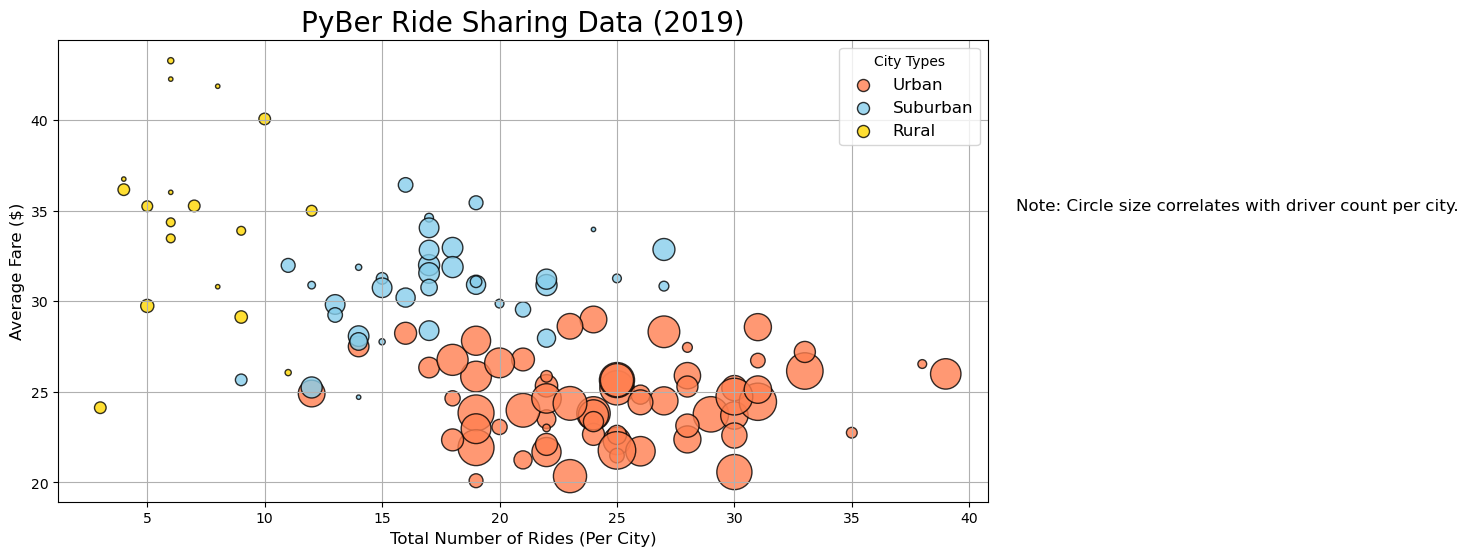

In [90]:
plt.subplots(figsize=(12,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")


plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")


plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

plt.title("PyBer Ride Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid(True)
plt.legend()
lgnd= plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc='best', title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12", wrap=True)
plt.show()

In [34]:
plt.savefig("Analysis/fig1.png")

In [35]:
# Get Summary Statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [36]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [37]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [39]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [40]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [41]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [43]:
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [44]:
urban_ride_count.median()

24.0

In [45]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [46]:
suburban_ride_count.mode()

0    17
dtype: int64

In [47]:
import numpy as np
import scipy.stats as sts

In [48]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [49]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [50]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [51]:
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [53]:
urban_fares.describe()

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [54]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [58]:
mean_urban_fares = np.mean(urban_fares) 
suburban_fares = suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares) 
rural_fares = rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)

In [59]:
mean_urban_fares, mean_suburban_fares, mean_rural_fares

(24.52577230769236, 30.97012800000002, 34.623440000000016)

In [60]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.mean(), suburban_drivers.mean(), rural_drivers.mean()

(36.67815384615385, 13.712, 4.296)

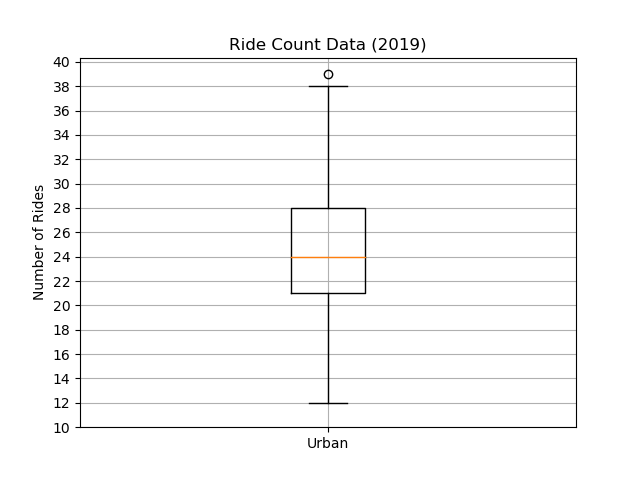

In [64]:
#Create a box and whisker plot for the urban cities ride count.
x_labels= ['Urban']
fix, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

In [65]:
plt.savefig("Analysis/Urban_ride_count.png")

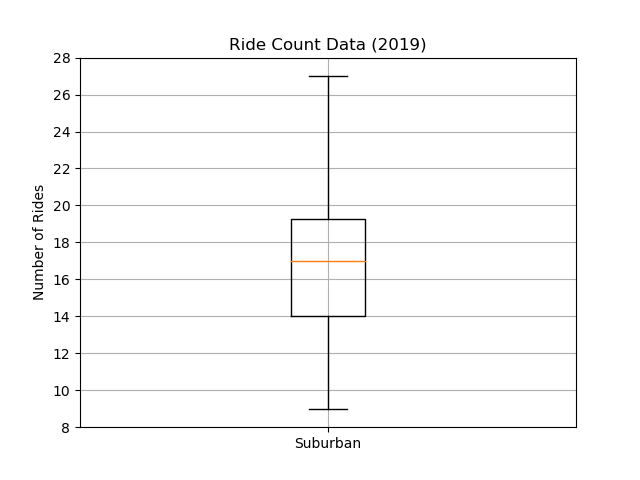

In [66]:
#min       9.000000
#max      27.000000

x_labels= ['Suburban']
fix, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8, 29, step=2.0))
ax.grid()

In [67]:
plt.savefig("Analysis/suburban_ride_count.png")

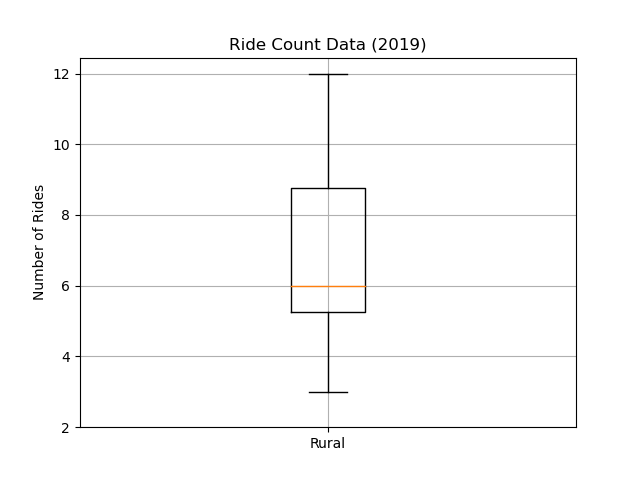

In [68]:
#min       3.000000
#max      12.000000

x_labels= ['Rural']
fix, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 14, step=2.0))
ax.grid()

In [69]:
plt.savefig("Analysis/rural_ride_count.png")

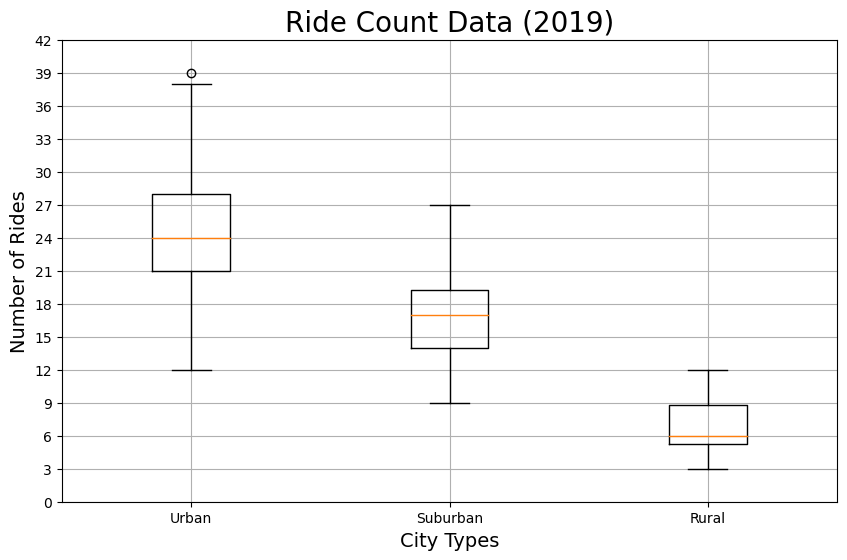

In [91]:
#Combine the three sets of ride count data
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

In [71]:
plt.savefig("analysis/Fig2.png")

In [72]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


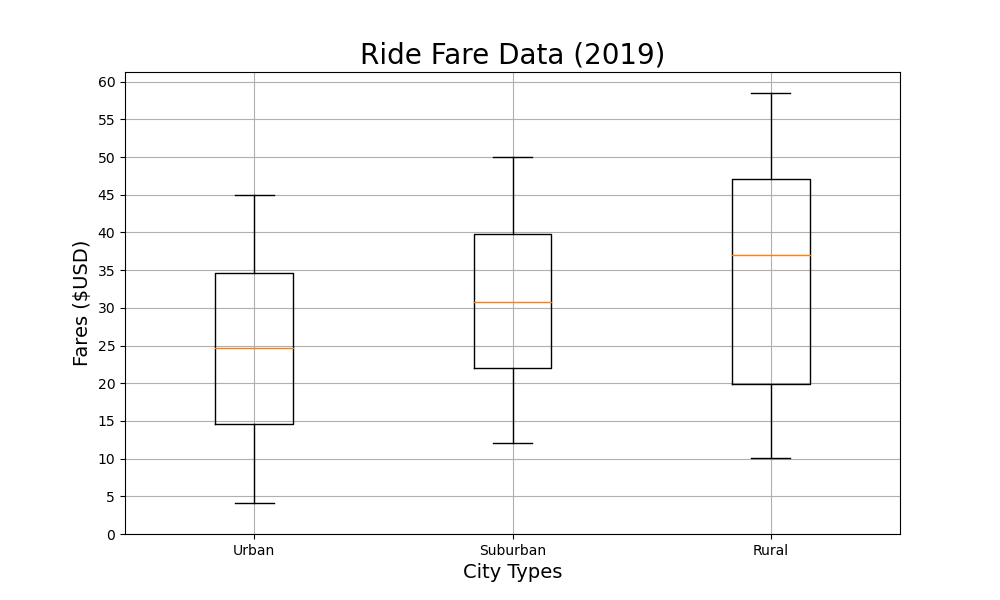

In [78]:
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fares ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()

In [79]:
plt.savefig("analysis/Fig3.png")

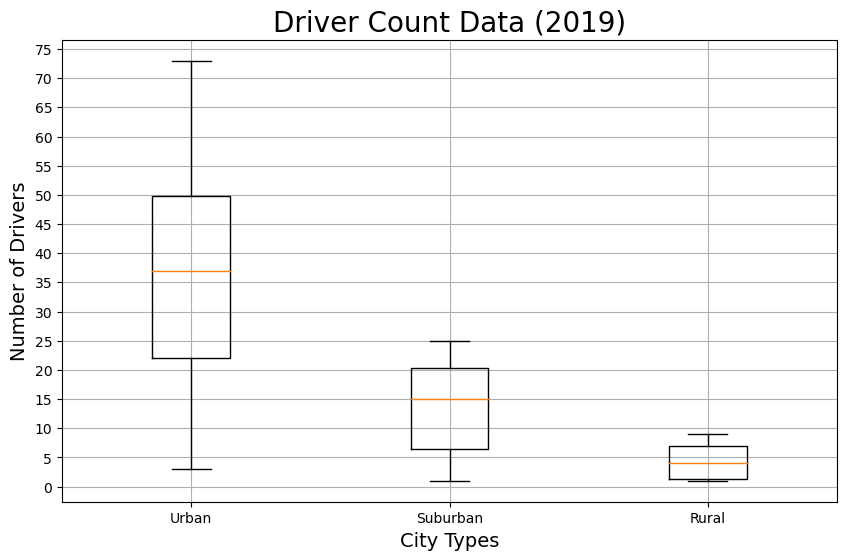

In [92]:
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

In [81]:
plt.savefig("analysis/Fig4.png")

In [82]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [83]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [84]:
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [95]:
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]

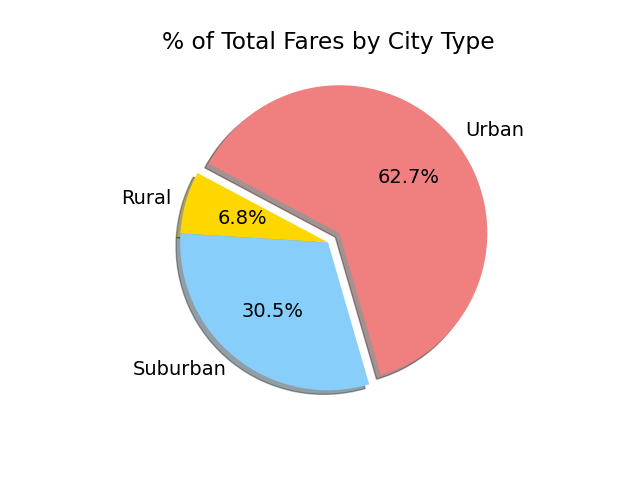

In [112]:
import matplotlib as mpl
plt.pie(type_percents, 
        labels=(labels),
        colors=(colors),
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle = 152
       )
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

In [113]:
plt.savefig("analysis/Fig5.png")